In [1]:
import json

from climateforcing.utils import mkdir_p
import fair
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import scipy.stats as st

## Set up plotting styles

In [2]:
pl.rcParams['figure.figsize'] = (12/2.54, 9/2.54)
pl.rcParams['font.size'] = 12
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['ytick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True

## Load up saved output

In [3]:
df_in = {}
for var in ['temperature', 'ERFaer']:
    df_in[var] = pd.read_csv('../data_output/fair_{}/ssp126.csv'.format(var), index_col='year')

In [4]:
df_in['temperature']

,0,1,2,3,4,5,6,7,8,9,...,3741,3742,3743,3744,3745,3746,3747,3748,3749,3750
year,,,,,,,,,,,,,,,,,,,,,
1750.5,0.0351,-0.0316,-0.0300,-0.0063,-0.0590,0.1159,0.0212,0.0450,0.0288,-0.0054,...,0.0108,0.0142,-0.0226,-0.0128,-0.0152,-0.0307,-0.0526,-0.0257,0.0145,0.0095
1751.5,0.0644,-0.0096,-0.0119,0.0124,-0.0353,0.1377,0.0468,0.0691,0.0477,0.0131,...,0.0344,0.0393,-0.0008,0.0123,0.0072,-0.0093,-0.0296,-0.0030,0.0333,0.0345
1752.5,0.0838,0.0068,-0.0025,0.0178,-0.0198,0.1529,0.0637,0.0863,0.0531,0.0279,...,0.0477,0.0540,0.0118,0.0311,0.0221,0.0034,-0.0151,0.0120,0.0399,0.0455
1753.5,0.0929,0.0178,0.0003,0.0159,-0.0117,0.1612,0.0724,0.0966,0.0508,0.0378,...,0.0537,0.0599,0.0181,0.0436,0.0303,0.0087,-0.0078,0.0210,0.0398,0.0472
1754.5,0.0924,0.0239,-0.0017,0.0098,-0.0099,0.1619,0.0736,0.1002,0.0437,0.0425,...,0.0545,0.0582,0.0198,0.0498,0.0328,0.0077,-0.0064,0.0249,0.0358,0.0427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096.5,1.9644,1.5565,1.2702,1.0568,1.4138,2.3015,1.7254,2.2941,1.2170,1.8090,...,1.7256,1.5182,1.9969,2.2335,1.5000,1.5626,1.4828,1.6805,1.4318,1.2586
2097.5,1.9626,1.5494,1.2662,1.0532,1.4077,2.3064,1.7226,2.2936,1.2143,1.8048,...,1.7229,1.5129,1.9925,2.2276,1.4955,1.5570,1.4771,1.6744,1.4291,1.2547
2098.5,1.9609,1.5425,1.2622,1.0496,1.4016,2.3115,1.7200,2.2933,1.2117,1.8008,...,1.7202,1.5077,1.9883,2.2219,1.4911,1.5516,1.4715,1.6684,1.4264,1.2510


In [5]:
hadcrut5_df = pd.read_csv('../data_input/gsat/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv')

In [6]:
mkdir_p('../plots/')

In [7]:
n_ens = df_in['temperature'].shape[1]
n_ens

3751

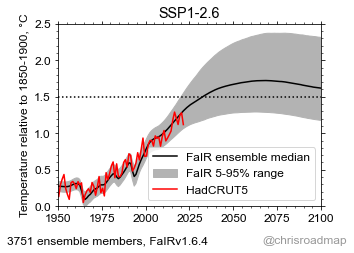

In [8]:
fig,ax=pl.subplots()
ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'], axis=1), color='k', label='FaIR ensemble median')
ax.fill_between(np.arange(1750.5,2101), np.percentile(df_in['temperature'], 5, axis=1), np.percentile(df_in['temperature'], 95, axis=1), label='FaIR 5-95% range', color="0.7")
ax.plot(np.arange(1850.5,2022), hadcrut5_df.loc[:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), color='r', label='HadCRUT5')
ax.set_xlim(1950,2100)
ax.set_ylim(0,2.5)
ax.axhline(1.5, ls=':', color='k')
ax.set_title('SSP1-2.6')
ax.legend(loc='lower right')
ax.set_ylabel('Temperature relative to 1850-1900, °C')
pl.figtext(1,0.02,'@chrisroadmap',ha='right', color='0.6')
pl.figtext(0,0.02,f'{n_ens} ensemble members, FaIRv{fair.__version__}')
fig.tight_layout(rect=[0.0,0.05,1,1])
fig.patch.set_facecolor('white')
pl.savefig('../plots/ssp126-default.png')

## Characterise by aerosol forcing

In [9]:
df_in['ERFaer'].loc[2005.5:2014.5].mean(axis=0)

0      -1.32238
1      -1.31243
2      -0.36760
3      -0.46419
4      -0.97571
         ...   
3746   -0.78873
3747   -0.67394
3748   -0.69738
3749   -0.81941
3750   -0.82748
Length: 3751, dtype: float64

In [10]:
np.percentile(df_in['ERFaer'].loc[2005.5:2014.5].mean(axis=0), (5, 10, 50, 90, 95))

array([-1.69166 , -1.57341 , -1.14949 , -0.73586 , -0.603555])

In [11]:
print(np.mean(df_in['ERFaer'].loc[2005.5:2014.5].mean(axis=0)))
print(np.std(df_in['ERFaer'].loc[2005.5:2014.5].mean(axis=0)))

-1.1526340469208212
0.32579548934045244


In [12]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=7324789)
aer_strong = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(df_in['ERFaer'].loc[2005.5:2014.5,str(i)].mean(axis=0), loc=-1.53, scale=0.10)/st.norm.pdf(-1.53, loc=-1.53, scale=0.10)
    if likelihood>=accept_prob[i]:
        aer_strong[i] = True
np.sum(aer_strong)

576

(array([  3.,  14.,  33.,  87., 111., 138., 101.,  64.,  15.,  10.]),
 array([-1.80528 , -1.748019, -1.690758, -1.633497, -1.576236, -1.518975,
        -1.461714, -1.404453, -1.347192, -1.289931, -1.23267 ]),
 <BarContainer object of 10 artists>)

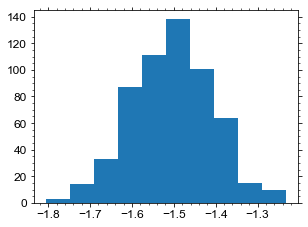

In [13]:
pl.hist(df_in['ERFaer'].loc[2005.5:2014.5,aer_strong].mean(axis=0))

In [14]:
df_in['ERFaer'].loc[2005.5:2014.5,aer_strong].mean().mean()

-1.5048390624999999

In [15]:
df_in['ERFaer'].loc[2005.5:2014.5,aer_strong].mean().std()

0.09628751097754058

In [16]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=83713790)
aer_weak = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(df_in['ERFaer'].loc[2005.5:2014.5,str(i)].mean(axis=0), loc=-0.44, scale=0.11)/st.norm.pdf(-0.44, loc=-0.44, scale=0.11)
    if likelihood>=accept_prob[i]:
        aer_weak[i] = True
np.sum(aer_weak)

147

(array([ 7., 12., 11., 35., 24., 26., 22.,  5.,  3.,  2.]),
 array([-0.72845 , -0.676956, -0.625462, -0.573968, -0.522474, -0.47098 ,
        -0.419486, -0.367992, -0.316498, -0.265004, -0.21351 ]),
 <BarContainer object of 10 artists>)

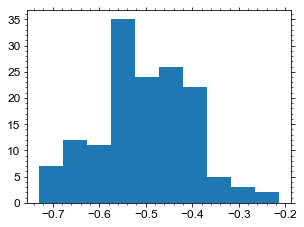

In [17]:
pl.hist(df_in['ERFaer'].loc[2005.5:2014.5,aer_weak].mean(axis=0))

In [18]:
df_in['ERFaer'].loc[2005.5:2014.5,aer_weak].mean().mean()

-0.5032768027210884

In [19]:
df_in['ERFaer'].loc[2005.5:2014.5,aer_weak].mean().std()

0.09871241389772419

In [20]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=42417764)
aer_central = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(df_in['ERFaer'].loc[2005.5:2014.5,str(i)].mean(axis=0), loc=-0.99, scale=0.11)/st.norm.pdf(-0.99, loc=-0.99, scale=0.11)
    if likelihood>=accept_prob[i]:
        aer_central[i] = True
np.sum(aer_central)

1054

(array([  8.,  25.,  62., 169., 259., 274., 169.,  72.,  14.,   2.]),
 array([-1.35534 , -1.284983, -1.214626, -1.144269, -1.073912, -1.003555,
        -0.933198, -0.862841, -0.792484, -0.722127, -0.65177 ]),
 <BarContainer object of 10 artists>)

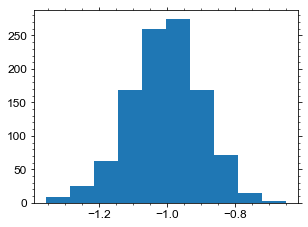

In [21]:
pl.hist(df_in['ERFaer'].loc[2005.5:2014.5,aer_central].mean(axis=0))

In [22]:
df_in['ERFaer'].loc[2005.5:2014.5,aer_central].mean().mean()

-1.0048018311195446

In [23]:
df_in['ERFaer'].loc[2005.5:2014.5,aer_central].mean().std()

0.10455782054263

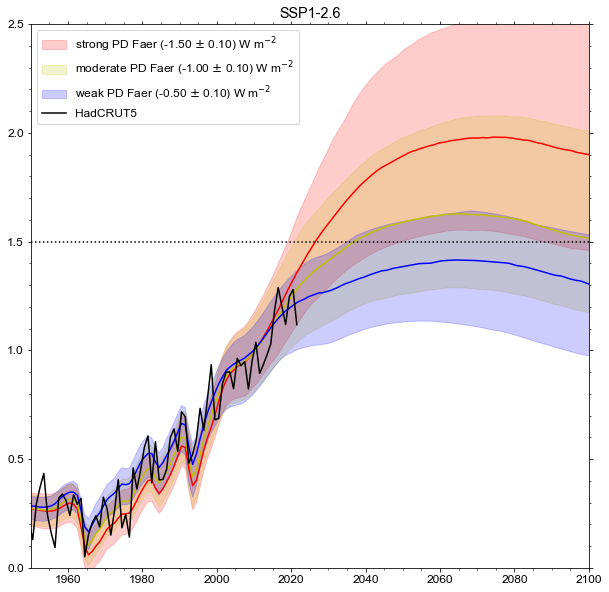

In [24]:
fig,ax=pl.subplots(figsize=(10,10))
ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,aer_strong], axis=1), color='r')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,aer_strong], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,aer_strong], 95, axis=1), 
    color="r", alpha=0.2, 
    label='strong PD Faer (%.2f $\pm$ %.2f) W m$^{-2}$' % 
    (df_in['ERFaer'].loc[2005.5:2014.5,aer_strong].mean().mean(), df_in['ERFaer'].loc[2005.5:2014.5,aer_strong].mean().std())
)

ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,aer_central], axis=1), color='y')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,aer_central], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,aer_central], 95, axis=1), 
    color="y", alpha=0.2, label='moderate PD Faer (%.2f $\pm$ %.2f) W m$^{-2}$' % 
    (df_in['ERFaer'].loc[2005.5:2014.5,aer_central].mean().mean(), df_in['ERFaer'].loc[2005.5:2014.5,aer_central].mean().std())
)

ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,aer_weak], axis=1), color='b')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,aer_weak], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,aer_weak], 95, axis=1), 
    color="b", alpha=0.2, label='weak PD Faer (%.2f $\pm$ %.2f) W m$^{-2}$' % 
    (df_in['ERFaer'].loc[2005.5:2014.5,aer_weak].mean().mean(), df_in['ERFaer'].loc[2005.5:2014.5,aer_weak].mean().std())
)
ax.plot(
    np.arange(1850.5,2022), 
    hadcrut5_df.loc[:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), 
    color='k', label='HadCRUT5'
)
ax.set_xlim(1950,2100)
ax.set_ylim(0, 2.5)
ax.axhline(1.5, ls=':', color='k')
ax.legend(loc='upper left')
ax.set_title('SSP1-2.6')
pl.savefig('../plots/ssp126_three_aer_forcings.png')

In [25]:
aer_minus1_lb = df_in['ERFaer'].loc[2005.5:2014.5].mean()>-1

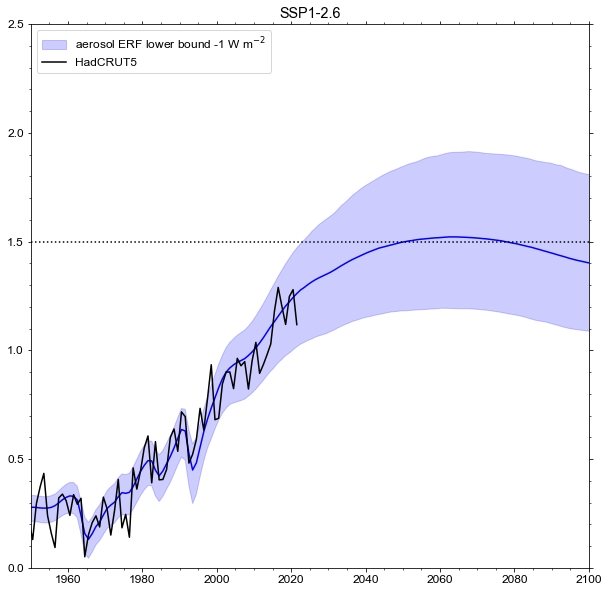

In [26]:
fig,ax=pl.subplots(figsize=(10,10))

ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,aer_minus1_lb], axis=1), color='b')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,aer_minus1_lb], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,aer_minus1_lb], 95, axis=1), 
    color="b", alpha=0.2, label='aerosol ERF lower bound -1 W m$^{-2}$'
)

ax.plot(
    np.arange(1850.5,2022), 
    hadcrut5_df.loc[:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), 
    color='k', label='HadCRUT5'
)
ax.set_xlim(1950,2100)
ax.set_ylim(0, 2.5)
ax.axhline(1.5, ls=':', color='k')
ax.legend(loc='upper left')
ax.set_title('SSP1-2.6')
pl.savefig('../plots/ssp126_aer_lower_bound_-1.png')

## Characterise by ECS

In [27]:
with open('../data_input/ar6-fair-samples/fair-1.6.2-wg3-params-slim-reconstrained.json') as f:
    config_list_variable = json.load(f)

In [28]:
def get_ecs(cfg):
    return(cfg['F2x']/cfg['lambda_global'])

In [29]:
ecs = np.zeros(n_ens)
for i, cfg in enumerate(config_list_variable):
    ecs[i] = get_ecs(cfg)

[2.04200537 2.20747924 2.3413273  2.41607745 2.95374193 3.76714372
 3.9547568  4.41953287 5.12734391]


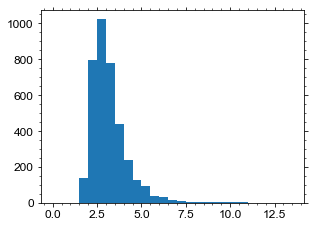

In [30]:
pl.hist(ecs, bins=np.arange(0, 14, 0.5))
print(np.percentile(ecs, (5, 10, 16, 20, 50, 80, 84, 90, 95)))

In [31]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=31445701)
high_ecs = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(ecs[i], loc=4.6, scale=0.45)/st.norm.pdf(4.6, loc=4.6, scale=0.45)
    if likelihood>=accept_prob[i]:
        high_ecs[i] = True
np.sum(high_ecs)

397

In [32]:
ecs[high_ecs].mean(), ecs[high_ecs].std()

(4.3984972398444, 0.44209223142822174)

(array([  1.,  11.,  39.,  77., 108.,  80.,  52.,  22.,   6.,   1.]),
 array([3.029597  , 3.31971428, 3.60983155, 3.89994883, 4.19006611,
        4.48018338, 4.77030066, 5.06041794, 5.35053521, 5.64065249,
        5.93076977]),
 <BarContainer object of 10 artists>)

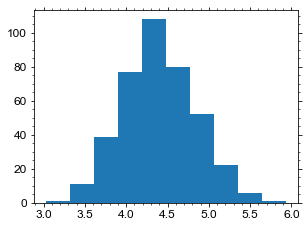

In [33]:
pl.hist(ecs[high_ecs])

In [34]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=43245452)
low_ecs = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(ecs[i], loc=1.98, scale=0.3)/st.norm.pdf(1.98, loc=1.98, scale=0.3)
    if likelihood>=accept_prob[i]:
        low_ecs[i] = True
np.sum(low_ecs)

670

In [35]:
ecs[low_ecs].mean(), ecs[low_ecs].std()

(2.2002554834325525, 0.22260913971535262)

(array([ 22.,  75., 146., 160., 159.,  68.,  30.,   5.,   3.,   2.]),
 array([1.66821017, 1.81622541, 1.96424064, 2.11225588, 2.26027111,
        2.40828635, 2.55630158, 2.70431682, 2.85233205, 3.00034729,
        3.14836252]),
 <BarContainer object of 10 artists>)

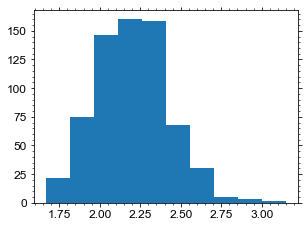

In [36]:
pl.hist(ecs[low_ecs])

In [37]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=424326843)
mid_ecs = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(ecs[i], loc=3, scale=0.31)/st.norm.pdf(3, loc=3, scale=0.31)
    if likelihood>=accept_prob[i]:
        mid_ecs[i] = True
np.sum(mid_ecs)

1400

In [38]:
ecs[mid_ecs].mean(), ecs[mid_ecs].std()

(2.9460983266750644, 0.2906993077473888)

(array([ 14.,  61., 170., 279., 321., 277., 172.,  82.,  16.,   8.]),
 array([2.13632552, 2.31334576, 2.49036599, 2.66738623, 2.84440646,
        3.02142669, 3.19844693, 3.37546716, 3.5524874 , 3.72950763,
        3.90652787]),
 <BarContainer object of 10 artists>)

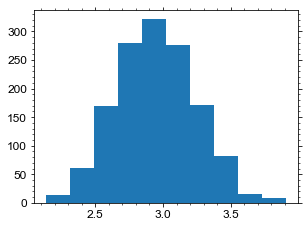

In [39]:
pl.hist(ecs[mid_ecs])

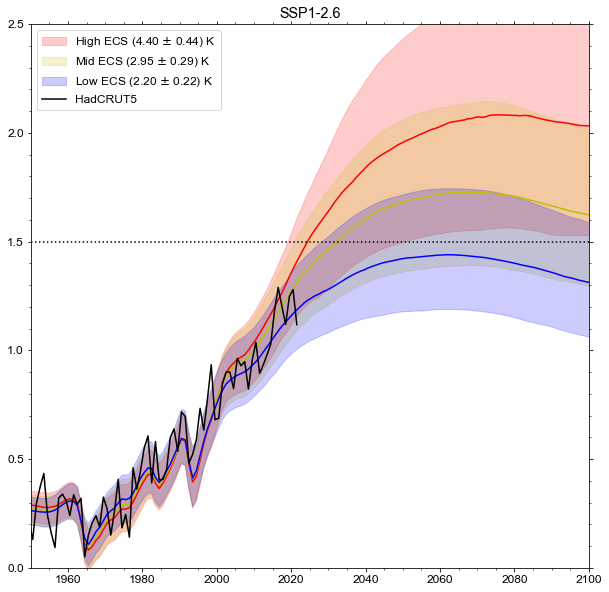

In [40]:
fig,ax=pl.subplots(figsize=(10,10))

ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,high_ecs], axis=1), color='r')
ax.fill_between(np.arange(1750.5,2101), np.percentile(df_in['temperature'].loc[:,high_ecs], 5, axis=1), np.percentile(df_in['temperature'].loc[:,high_ecs], 95, axis=1), color="r", alpha=0.2, label='High ECS (%.2f $\pm$ %.2f) K' % (ecs[high_ecs].mean(), ecs[high_ecs].std()))
ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,mid_ecs], axis=1), color='y')
ax.fill_between(np.arange(1750.5,2101), np.percentile(df_in['temperature'].loc[:,mid_ecs], 5, axis=1), np.percentile(df_in['temperature'].loc[:,mid_ecs], 95, axis=1), color="y", alpha=0.2, label='Mid ECS (%.2f $\pm$ %.2f) K' % (ecs[mid_ecs].mean(), ecs[mid_ecs].std()))
ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,low_ecs], axis=1), color='b')
ax.fill_between(np.arange(1750.5,2101), np.percentile(df_in['temperature'].loc[:,low_ecs], 5, axis=1), np.percentile(df_in['temperature'].loc[:,low_ecs], 95, axis=1), color="b", alpha=0.2, label='Low ECS (%.2f $\pm$ %.2f) K' % (ecs[low_ecs].mean(), ecs[low_ecs].std()))
ax.plot(np.arange(1850.5,2022), hadcrut5_df.loc[:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), color='k', label='HadCRUT5')
ax.set_xlim(1950,2100)
ax.set_ylim(0, 2.5)
ax.axhline(1.5, ls=':', color='k')
ax.legend(loc='upper left')
ax.set_title('SSP1-2.6')
pl.savefig('../plots/ssp126_three_ecs_distributions.png')

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00629723, 0.06926952, 0.37783375,
        0.82493703, 0.74307305, 0.37153652, 0.10075567, 0.00629723,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. , 8.4, 8.8, 9.2, 9.6]),
 <BarContainer object of 24 artists>)

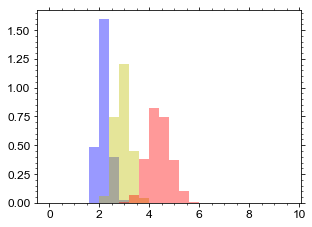

In [41]:
pl.hist(ecs[low_ecs], bins=np.arange(0,10,.4), alpha=0.4, density=True, color='b')
pl.hist(ecs[mid_ecs], bins=np.arange(0,10,.4), alpha=0.4, density=True, color='y')
pl.hist(ecs[high_ecs], bins=np.arange(0,10,.4), alpha=0.4, density=True, color='r')

## Characterise by rate of change of aerosol forcing

Do as a regression

### mean of 2010-2020 minus 2000-2010

array([0.011375, 0.02639 , 0.07646 , 0.12444 , 0.137685])

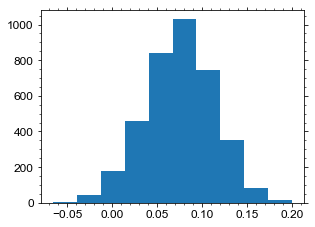

In [42]:
pl.hist(df_in['ERFaer'].loc[2010.5:2019.5].mean()-df_in['ERFaer'].loc[2000.5:2009.5].mean())
np.percentile(df_in['ERFaer'].loc[2010.5:2019.5].mean()-df_in['ERFaer'].loc[2000.5:2009.5].mean(), (5, 10, 50, 90, 95))

### regression slope

In [43]:
rates = np.zeros(n_ens)
for i_ens in range(n_ens):
    rates[i_ens] = st.linregress(np.arange(2000.5, 2020), df_in['ERFaer'].loc[2000.5:2019.5, str(i_ens)]).slope

array([0.00215974, 0.0035412 , 0.00783677, 0.01222895, 0.0134585 ])

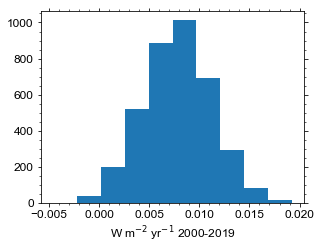

In [44]:
pl.hist(rates)
pl.xlabel('W m$^{-2}$ yr$^{-1}$ 2000-2019')
np.percentile(rates, (5, 10, 50, 90, 95))

In [45]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=1293650)
recov_slow = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(rates[i], loc=0.003195, scale=0.001)/st.norm.pdf(0.003195, loc=0.003195, scale=0.001)
    if likelihood>=accept_prob[i]:
        recov_slow[i] = True
np.sum(recov_slow)

450

(array([  2.,  13.,  44.,  77., 100., 120.,  65.,  18.,   8.,   3.]),
 array([0.00039895, 0.00105014, 0.00170134, 0.00235253, 0.00300373,
        0.00365492, 0.00430612, 0.00495732, 0.00560851, 0.00625971,
        0.0069109 ]),
 <BarContainer object of 10 artists>)

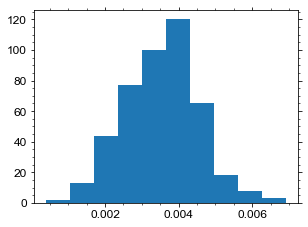

In [46]:
pl.hist(rates[recov_slow])

In [47]:
# 0.0035412 
rates[recov_slow].mean()

0.003541707769423559

In [48]:
rates[recov_slow].std()

0.0010032938566532856

In [49]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=40961094)
recov_fast = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(rates[i], loc=0.01259, scale=0.001)/st.norm.pdf(0.01259, loc=0.01259, scale=0.001)
    if likelihood>=accept_prob[i]:
        recov_fast[i] = True
np.sum(recov_fast)

443

(array([  3.,  14.,  31.,  57., 111.,  98.,  73.,  40.,   9.,   7.]),
 array([0.0092594 , 0.0098409 , 0.01042241, 0.01100391, 0.01158541,
        0.01216692, 0.01274842, 0.01332992, 0.01391143, 0.01449293,
        0.01507444]),
 <BarContainer object of 10 artists>)

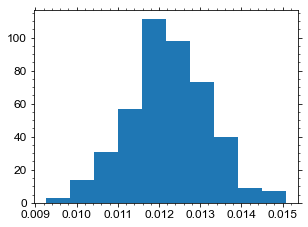

In [50]:
pl.hist(rates[recov_fast])

In [51]:
# 0.01222895
rates[recov_fast].mean()

0.012224490571801968

In [52]:
rates[recov_fast].std()

0.0009729461180306544

In [53]:
accept_prob = st.uniform.rvs(loc=0, scale=1, size=n_ens, random_state=24678762)
recov_central = np.zeros(n_ens, dtype=bool)
for i in range(n_ens):
    likelihood = st.norm.pdf(rates[i], loc=0.007845, scale=0.001)/st.norm.pdf(0.007845, loc=0.007845, scale=0.001)
    if likelihood>=accept_prob[i]:
        recov_central[i] = True
np.sum(recov_central)

1054

(array([  2.,  12.,  59., 139., 214., 283., 193., 114.,  30.,   8.]),
 array([0.00447617, 0.00510707, 0.00573797, 0.00636887, 0.00699977,
        0.00763068, 0.00826158, 0.00889248, 0.00952338, 0.01015429,
        0.01078519]),
 <BarContainer object of 10 artists>)

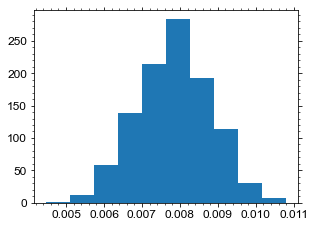

In [54]:
pl.hist(rates[recov_central])

In [55]:
# 0.00783677
rates[recov_central].mean()

0.007836694154741693

In [56]:
rates[recov_central].std()

0.0009700685590194936

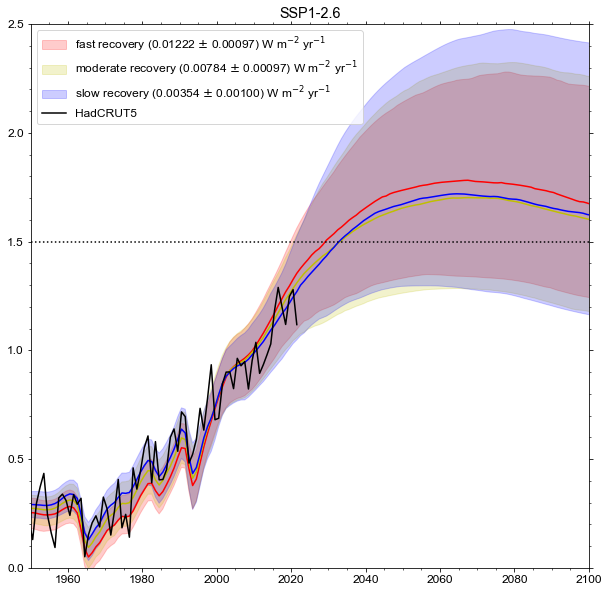

In [57]:
fig,ax=pl.subplots(figsize=(10,10))
ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,recov_fast], axis=1), color='r')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,recov_fast], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,recov_fast], 95, axis=1), 
    color="r", alpha=0.2, 
    label='fast recovery (%.5f $\pm$ %.5f) W m$^{-2}$ yr$^{-1}$' % 
    (rates[recov_fast].mean(), rates[recov_fast].std())
)

ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,recov_central], axis=1), color='y')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,recov_central], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,recov_central], 95, axis=1), 
    color="y", alpha=0.2, label='moderate recovery (%.5f $\pm$ %.5f) W m$^{-2}$ yr$^{-1}$' % 
    (rates[recov_central].mean(), rates[recov_central].std())
)

ax.plot(np.arange(1750.5,2101), np.median(df_in['temperature'].loc[:,recov_slow], axis=1), color='b')
ax.fill_between(
    np.arange(1750.5,2101), 
    np.percentile(df_in['temperature'].loc[:,recov_slow], 5, axis=1), 
    np.percentile(df_in['temperature'].loc[:,recov_slow], 95, axis=1), 
    color="b", alpha=0.2, label='slow recovery (%.5f $\pm$ %.5f) W m$^{-2}$ yr$^{-1}$' % 
    (rates[recov_slow].mean(), rates[recov_slow].std())
)
ax.plot(
    np.arange(1850.5,2022), 
    hadcrut5_df.loc[:171,'Anomaly (deg C)']-hadcrut5_df.loc[0:50,'Anomaly (deg C)'].mean(), 
    color='k', label='HadCRUT5'
)
ax.set_xlim(1950,2100)
ax.set_ylim(0, 2.5)
ax.axhline(1.5, ls=':', color='k')
ax.legend(loc='upper left')
ax.set_title('SSP1-2.6')
pl.savefig('../plots/ssp126_three_aer_recovery_rates.png')

## Make output data

In [58]:
df_ecs = pd.DataFrame(
    {
        'ECS': ecs,
        'low_ECS': low_ecs,
        'mid_ECS': mid_ecs,
        'high_ECS': high_ecs
    }
)

In [59]:
df_ecs

,ECS,low_ECS,mid_ECS,high_ECS
0,3.212607,False,True,False
1,2.115349,True,False,False
2,2.133679,False,False,False
3,1.800911,True,False,False
4,2.377077,True,False,False
...,...,...,...,...
3746,2.571759,False,True,False
3747,2.758806,False,True,False
3748,2.382116,False,False,False
3749,2.113336,True,False,False


In [60]:
mkdir_p('../data_output/')

In [61]:
df_ecs.to_csv('../data_output/ecs.csv')

In [62]:
df_aero_dists = pd.DataFrame(
    {
        'strong_aer': aer_strong,
        'mid_aer': aer_central,
        'weak_aer': aer_weak,
        'minus1_lb_aer': aer_minus1_lb
    }
)

In [63]:
df_aero_dists.to_csv('../data_output/aerosol_distributions.csv')

## Show that the strong aerosol forcing is Higher 2C

Likelihood of 50-66% of staying under 2C for entire 21st century:
- peak median warming < 2C
- peak 66th percentile warming > 2C

In [64]:
np.max(np.median(df_in['temperature'].loc[:,aer_strong], axis=1))

1.9809

In [65]:
np.max(np.percentile(df_in['temperature'].loc[:,aer_strong], 66, axis=1))

2.12275

## Show that the weak aerosol forcing is Below 1.5C

Likelihood of 50-66% of staying under 1.5C for entire 21st century:
- peak median warming < 1.5C
- peak 66th percentile warming > 1.5C

there is a lower unused category of SR1.5 where the 66th percentile is less than 1.5C and in fact it falls into this too

In [66]:
np.max(np.median(df_in['temperature'].loc[:,aer_weak], axis=1))

1.4156

In [67]:
np.max(np.percentile(df_in['temperature'].loc[:,aer_weak], 66, axis=1))

1.476392